# Predicting the type of  breast cancer

<div style="text-align: center;">
    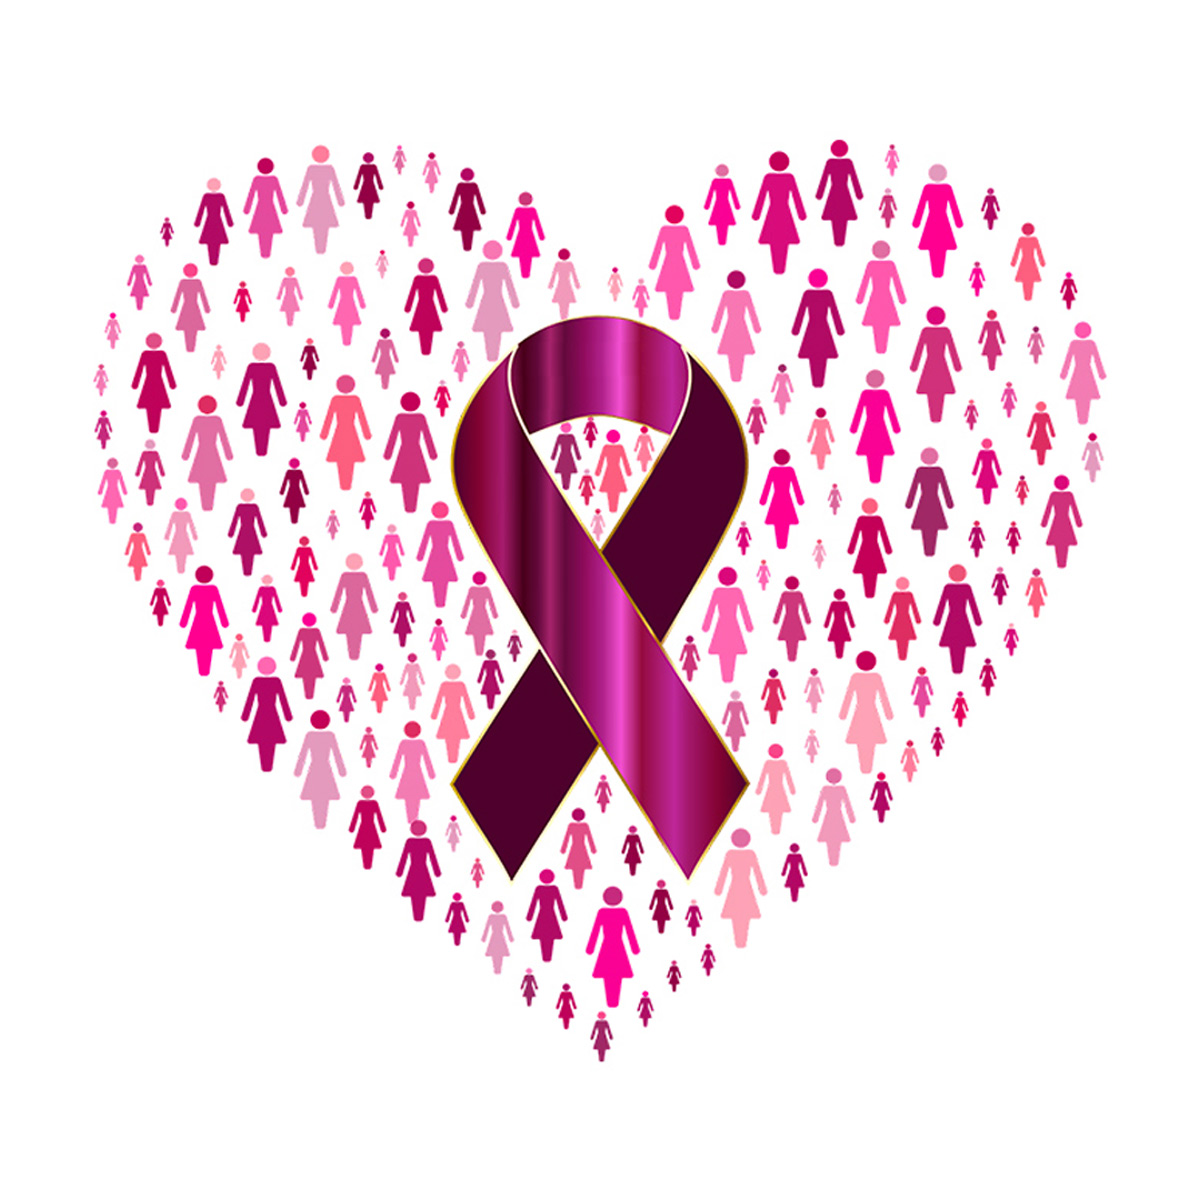 <!-- Adjust width as needed -->
</div>


#### For SC1015 Mini Project
NTU School of Computer Science and Engineering
- Lab group - **ACDA1**
- Group 6

Members
- [Joshua Foo Tse Ern (U2310147A)](https://github.com/josshhz11)
- [Kieran Voo E Kai (U2310753F)](https://github.com/xx)
- [Yuan Haoer (U2310565C)](https://github.com/xx)

## Dataset used
[Breast cancer gene expression - CuMiDa](https://www.kaggle.com/datasets/brunogrisci/breast-cancer-gene-expression-cumida)

### Problem Statement

There are 4 different classes of breast cancer:
1. HER
2. Basal
3. Luminal_A
4. Luminal_B

They differ on where the cancer had started, whether it has spread, and if there are specific hormones that allow it to grow further. Knowing the type of breast cancer can help to determine the type of treatment a patient should receive.

***As such, we aim to build an accurate prediction model to predict the type of cancer based on the given gene expression levels.***

### Machine Learning Algorthims Used

- Principal Component Analysis (PCA)
- K-Nearest Neighbors (KNN)
- Random Forest Classifier (RF)
- Support Vector Model (SVM)

### Topic covered in the notebook

1. Data Preparation and Cleaning
2. Exploratory Data Analysis
3. ML Models Analysis
4. Model Evaluation

### Importing relevant libraries

In [140]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics

# Data Preparation and Cleaning

In [141]:
df = pd.read_csv("Breast_GSE45827.csv")

In [142]:
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


***Ensure that dataset contains 51 rows and 54,677 columns before moving forward.***

In [143]:
print("Data dims; ",df.shape)

Data dims;  (151, 54677)


As shown from above, this data set provides us with 151 rows of samples, each containing 54,675 columns of gene expression levels.

In [144]:
df.iloc[:, :10].describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006


We need to first remove irrelevant types of breast cancer in the data set. 

'cell_line' (lab grown) and 'normal'(breast cancer not present) are removed as these will not aid in our exploration into the types of breast cancer caused by different expression levels of genes.

In [145]:
# Filter out rows where 'type' column is either 'cell_line' or 'normal'
df = df[~df['type'].isin(['cell_line', 'normal'])]

In [146]:
unique_cancer_types = df['type'].unique()
print("Unique types of cancer in the DataFrame:")
print(list(unique_cancer_types))

Unique types of cancer in the DataFrame:
['basal', 'HER', 'luminal_A', 'luminal_B']


cell_line and normal has been removed from the data frame

In [147]:
# Checking for duplicates
print(f"Total duplicates: {df.duplicated().sum()}")

Total duplicates: 0


In [148]:
# Checking if there is any NULL count in any feature
print(df.isna().sum())

print(f"Total null count: {df.isna().sum().sum()}")

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64
Total null count: 0


From the results, we observe that our data set has no duplicates and no missing values.

# Exploratory Data Analysis

type
basal        41
HER          30
luminal_B    30
luminal_A    29
Name: count, dtype: int64 




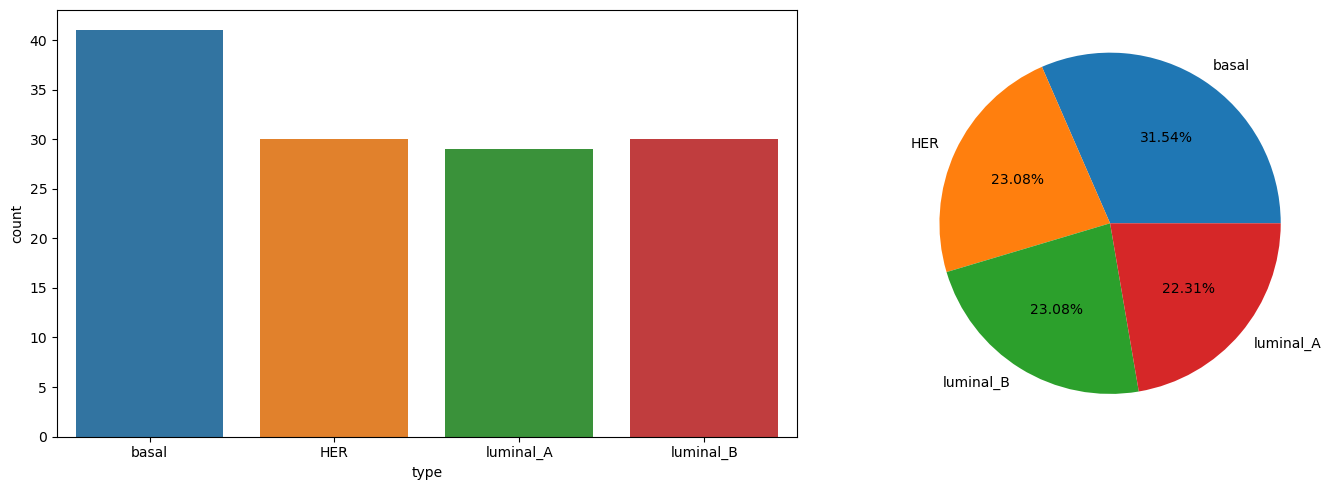

In [149]:
target  = "type"

val_counts = df[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = df[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

The distribution of cancer types in our data appears to be nearly uniform across all categories, indicating that the samples provide a comprehensive representation of all types.

## Splitting of Data

In [150]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=15)

# Output the shapes of the resulting datasets to verify the operations
train_data.shape, test_data.shape

((104, 54677), (26, 54677))

We will be breaking down the data set to 80:20 ratio.

## Principal Component Analysis (PCA)

Due to the large size in genes, we use PCA as a method to select the genes that are mostly likely to help us to select which genes to use to predict.

The PCA loadings represent how much each feature (genes in our case) contributes to each principal component. Principal components are ordered by the amount of variance they capture from the dataset.By focusing on the top components, we concentrate on the genes that contribute the most to the dataset's variability.

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [152]:
# Separating out the features and the target variable
features = train_data.drop(columns=['type', 'samples'])
target = train_data['type'] 

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Performing PCA
pca = PCA(n_components=42, random_state=15)
principal_components = pca.fit_transform(features_scaled)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components,
                      columns=['PC' + str(i) for i in range(1, principal_components.shape[1]+1)])
principal_df['type'] = target.reset_index(drop=True)

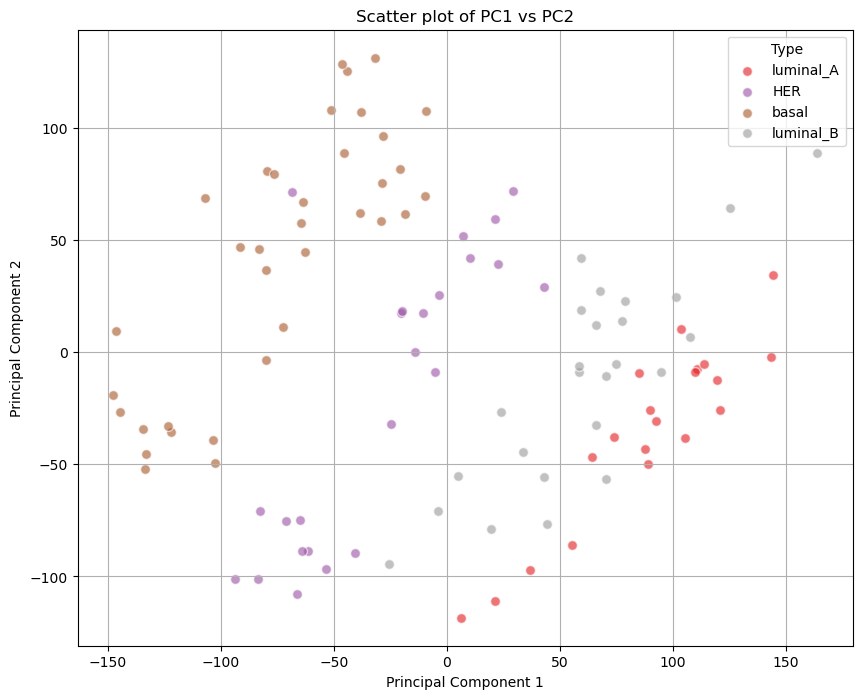

In [153]:
import matplotlib

# Map the categorical target variable to integers and retrieve unique labels
labels, uniques = pd.factorize(principal_df['type'])

# Choose a colormap that provides distinct colors for each class, up to the number of unique classes
colors = matplotlib.colormaps['Set1'](np.linspace(0, 1, len(uniques)))

# Creating the scatter plot of the first two principal components with discrete classes
plt.figure(figsize=(10, 8))
for i, unique in enumerate(uniques):
    subset = principal_df[principal_df['type'] == unique]
    plt.scatter(subset['PC1'], subset['PC2'], color=colors[i], label=unique, alpha=0.6, edgecolors='w', s=50)

plt.title('Scatter plot of PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Type')
plt.grid(True)
plt.show()

The degree of effectiveness of PCA is determined by the degree of overlap. 

We observe that there are distinct clusters that correspond to the different cancer types. This suggests that PCA is effective.

In [154]:
# Extracting the PCA loadings (components) and taking the top 15 components
loadings = pca.components_[:15].T 
max_loading_indices = np.argmax(np.abs(loadings), axis=0)

# Extracting the gene names corresponding for the top 15 principal components
gene_names = features.columns
top_genes = gene_names[max_loading_indices]

print(top_genes)

Index(['209024_s_at', '235009_at', '242145_at', '206470_at', '203508_at',
       '205306_x_at', '201389_at', '201471_s_at', '1561175_at', '242128_at',
       '1562736_at', '238554_at', '220709_at', '1554076_s_at', '233023_at'],
      dtype='object')


We haved used PCA to extract the top gene from each of the top 15 principal components. However, the top genes provided are named using their probe IDs.

In [155]:
!pip install mygene

In [156]:
import mygene

# Create a MyGeneInfo object
mg = mygene.MyGeneInfo()

# Query for gene symbols and names using the probe IDs
gene_info = mg.querymany(top_genes, scopes='reporter', fields='symbol,name', species='human')

# Convert the query results into a DataFrame for better readability
gene_df = pd.DataFrame(gene_info)

# Fill any missing data
gene_df['symbol'] = gene_df['symbol'].fillna('Not found')
gene_df['name'] = gene_df['name'].fillna('Not found')

print(gene_df[['query', 'symbol', 'name']])


3 input query terms found no hit:	['242145_at', '1561175_at', '233023_at']


           query     symbol                                               name
0    209024_s_at    SYNCRIP  synaptotagmin binding cytoplasmic RNA interact...
1      235009_at     BOD1L1  biorientation of chromosomes in cell division ...
2      242145_at  Not found                                          Not found
3      206470_at     PLXNC1                                          plexin C1
4      203508_at   TNFRSF1B                 TNF receptor superfamily member 1B
5    205306_x_at        KMO                         kynurenine 3-monooxygenase
6      201389_at      ITGA5                           integrin subunit alpha 5
7    201471_s_at     SQSTM1                                     sequestosome 1
8     1561175_at  Not found                                          Not found
9      242128_at       OTX2                           orthodenticle homeobox 2
10    1562736_at       LHX9                                     LIM homeobox 9
11     238554_at      CYB5B                         

We imported a library mygene to help us match the name to their probe IDs.

However, there were genes that found no hit and could not be identified.

In [157]:
# Filter out entries where the gene symbol is 'Not found'
gene_df = gene_df[gene_df['symbol'] != 'Not found']

We removed those genes that we could not identify. 

We do not know its biological significance in predicting the type of cancer if we are unable to identify the gene.

In [158]:
selected_gene_df = gene_df[['query', 'name', 'symbol']]

selected_gene_df.index = range(1, len(selected_gene_df) + 1)

# Display the dataframe
print(selected_gene_df)

           query                                               name    symbol
1    209024_s_at  synaptotagmin binding cytoplasmic RNA interact...   SYNCRIP
2      235009_at  biorientation of chromosomes in cell division ...    BOD1L1
3      206470_at                                          plexin C1    PLXNC1
4      203508_at                 TNF receptor superfamily member 1B  TNFRSF1B
5    205306_x_at                         kynurenine 3-monooxygenase       KMO
6      201389_at                           integrin subunit alpha 5     ITGA5
7    201471_s_at                                     sequestosome 1    SQSTM1
8      242128_at                           orthodenticle homeobox 2      OTX2
9     1562736_at                                     LIM homeobox 9      LHX9
10     238554_at                               cytochrome b5 type B     CYB5B
11     220709_at                            zinc finger protein 556    ZNF556
12  1554076_s_at                            TLC domain containin

This contains the 12 genes that we will use as predicting variables in our models.

## Visualising our Data

### Descriptive Statistics

In [159]:
# Calculating descriptive statistics for each gene
descriptive_stats = gene_df.describe()
print(descriptive_stats)

          _score
count  12.000000
mean   19.070404
std     0.622008
min    18.071053
25%    18.632591
50%    18.744302
75%    19.760128
max    19.771164


### Boxplot

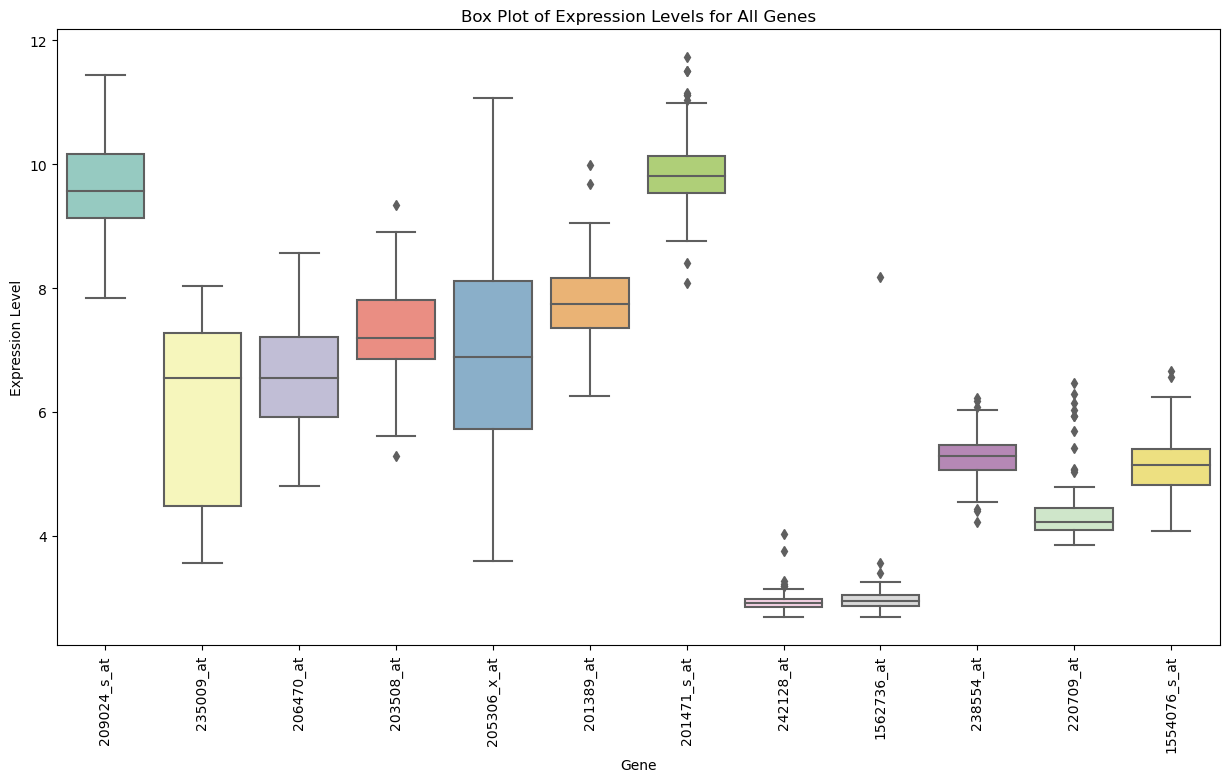

In [160]:
# Get the list of gene names from the 'query' column
gene_names = gene_df['query'].tolist()

# Filter the training data to only include the relevant genes
filtered_train_data = train_data[gene_names]

# Now let's melt the DataFrame so we can use seaborn's boxplot to show all genes
melted_train_data = filtered_train_data.melt(var_name='Gene', value_name='Expression Level')

# Generate a single box plot for all genes
plt.figure(figsize=(15, 8))
# Generate a list of colors with the same length as the number of unique genes in the plot
palette = sns.color_palette("Set3", n_colors=len(melted_train_data['Gene'].unique()))
# Create a mapping of gene to color
palette_dict = dict(zip(melted_train_data['Gene'].unique(), palette))
sns.boxplot(x='Gene', y='Expression Level', data=melted_train_data, hue='Gene', palette=palette_dict, dodge=False)
plt.xticks(rotation=90)
plt.title('Box Plot of Expression Levels for All Genes')
plt.legend([],[], frameon=False) 
plt.show()


***Observations and Analysis:***

- As seen from the boxplots, we observe that there are outliers when we compare the expression levels of each against different samples.

- However,outliers in gene expression data might hold critical biological information. Excluding them may remove unique patterns essential for identifying and classifying these subtypes accurately.

### Correlation Matrix

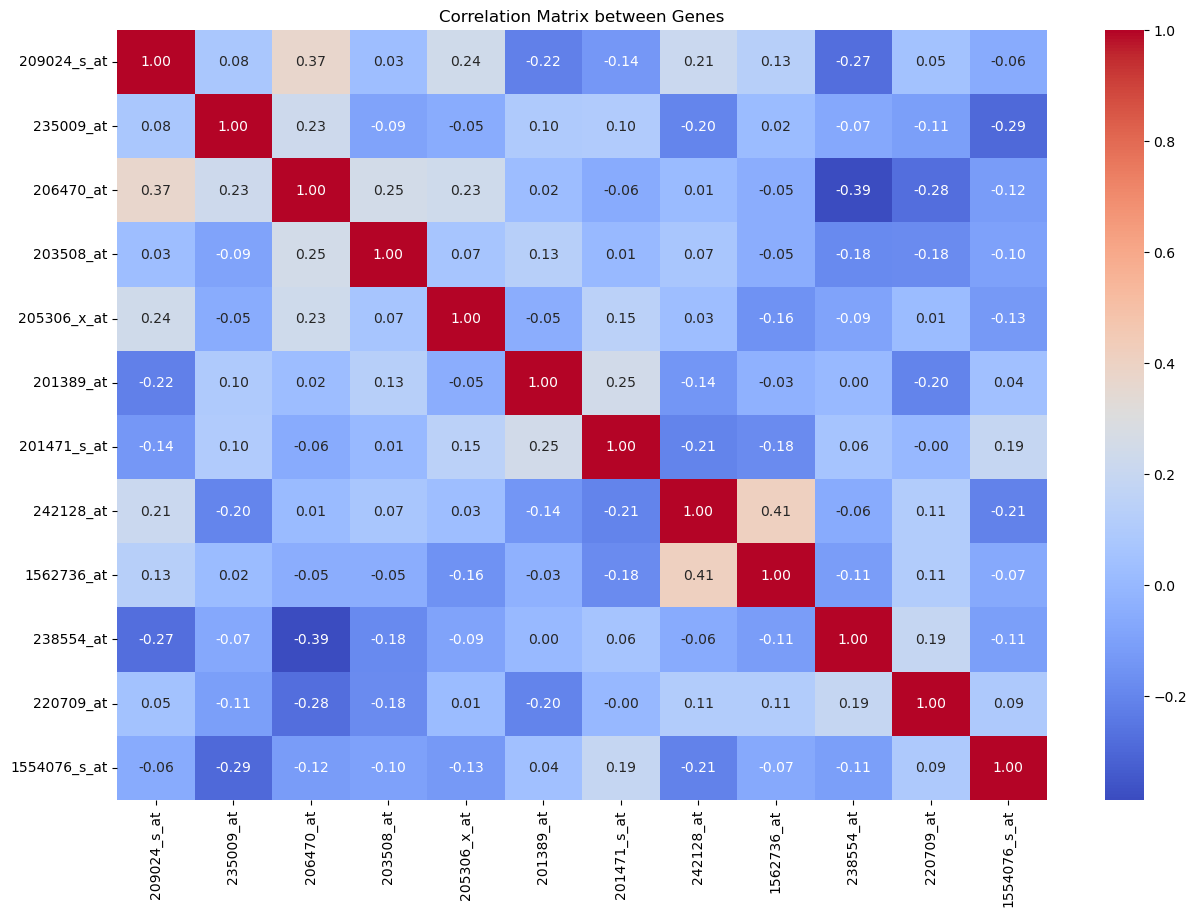

In [161]:
# Subset the train_data to include only the genes from gene_names
genes_data = train_data[gene_names]

# Compute the correlation matrix
correlation_matrix = genes_data.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix between Genes')
plt.show()

***Observations and Analysis:***

- Most gene pairs seem to have a low to moderate correlation.
- A few pairs show a stronger positive correlation, denoted by darker red colors. These might represent genes that are possibly co-related.
- There are also areas of darker blue, suggesting some gene pairs have a strong negative correlation, meaning as the expression of one gene increases, the other decreases.

### Pairplot

C:\Users\joshua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


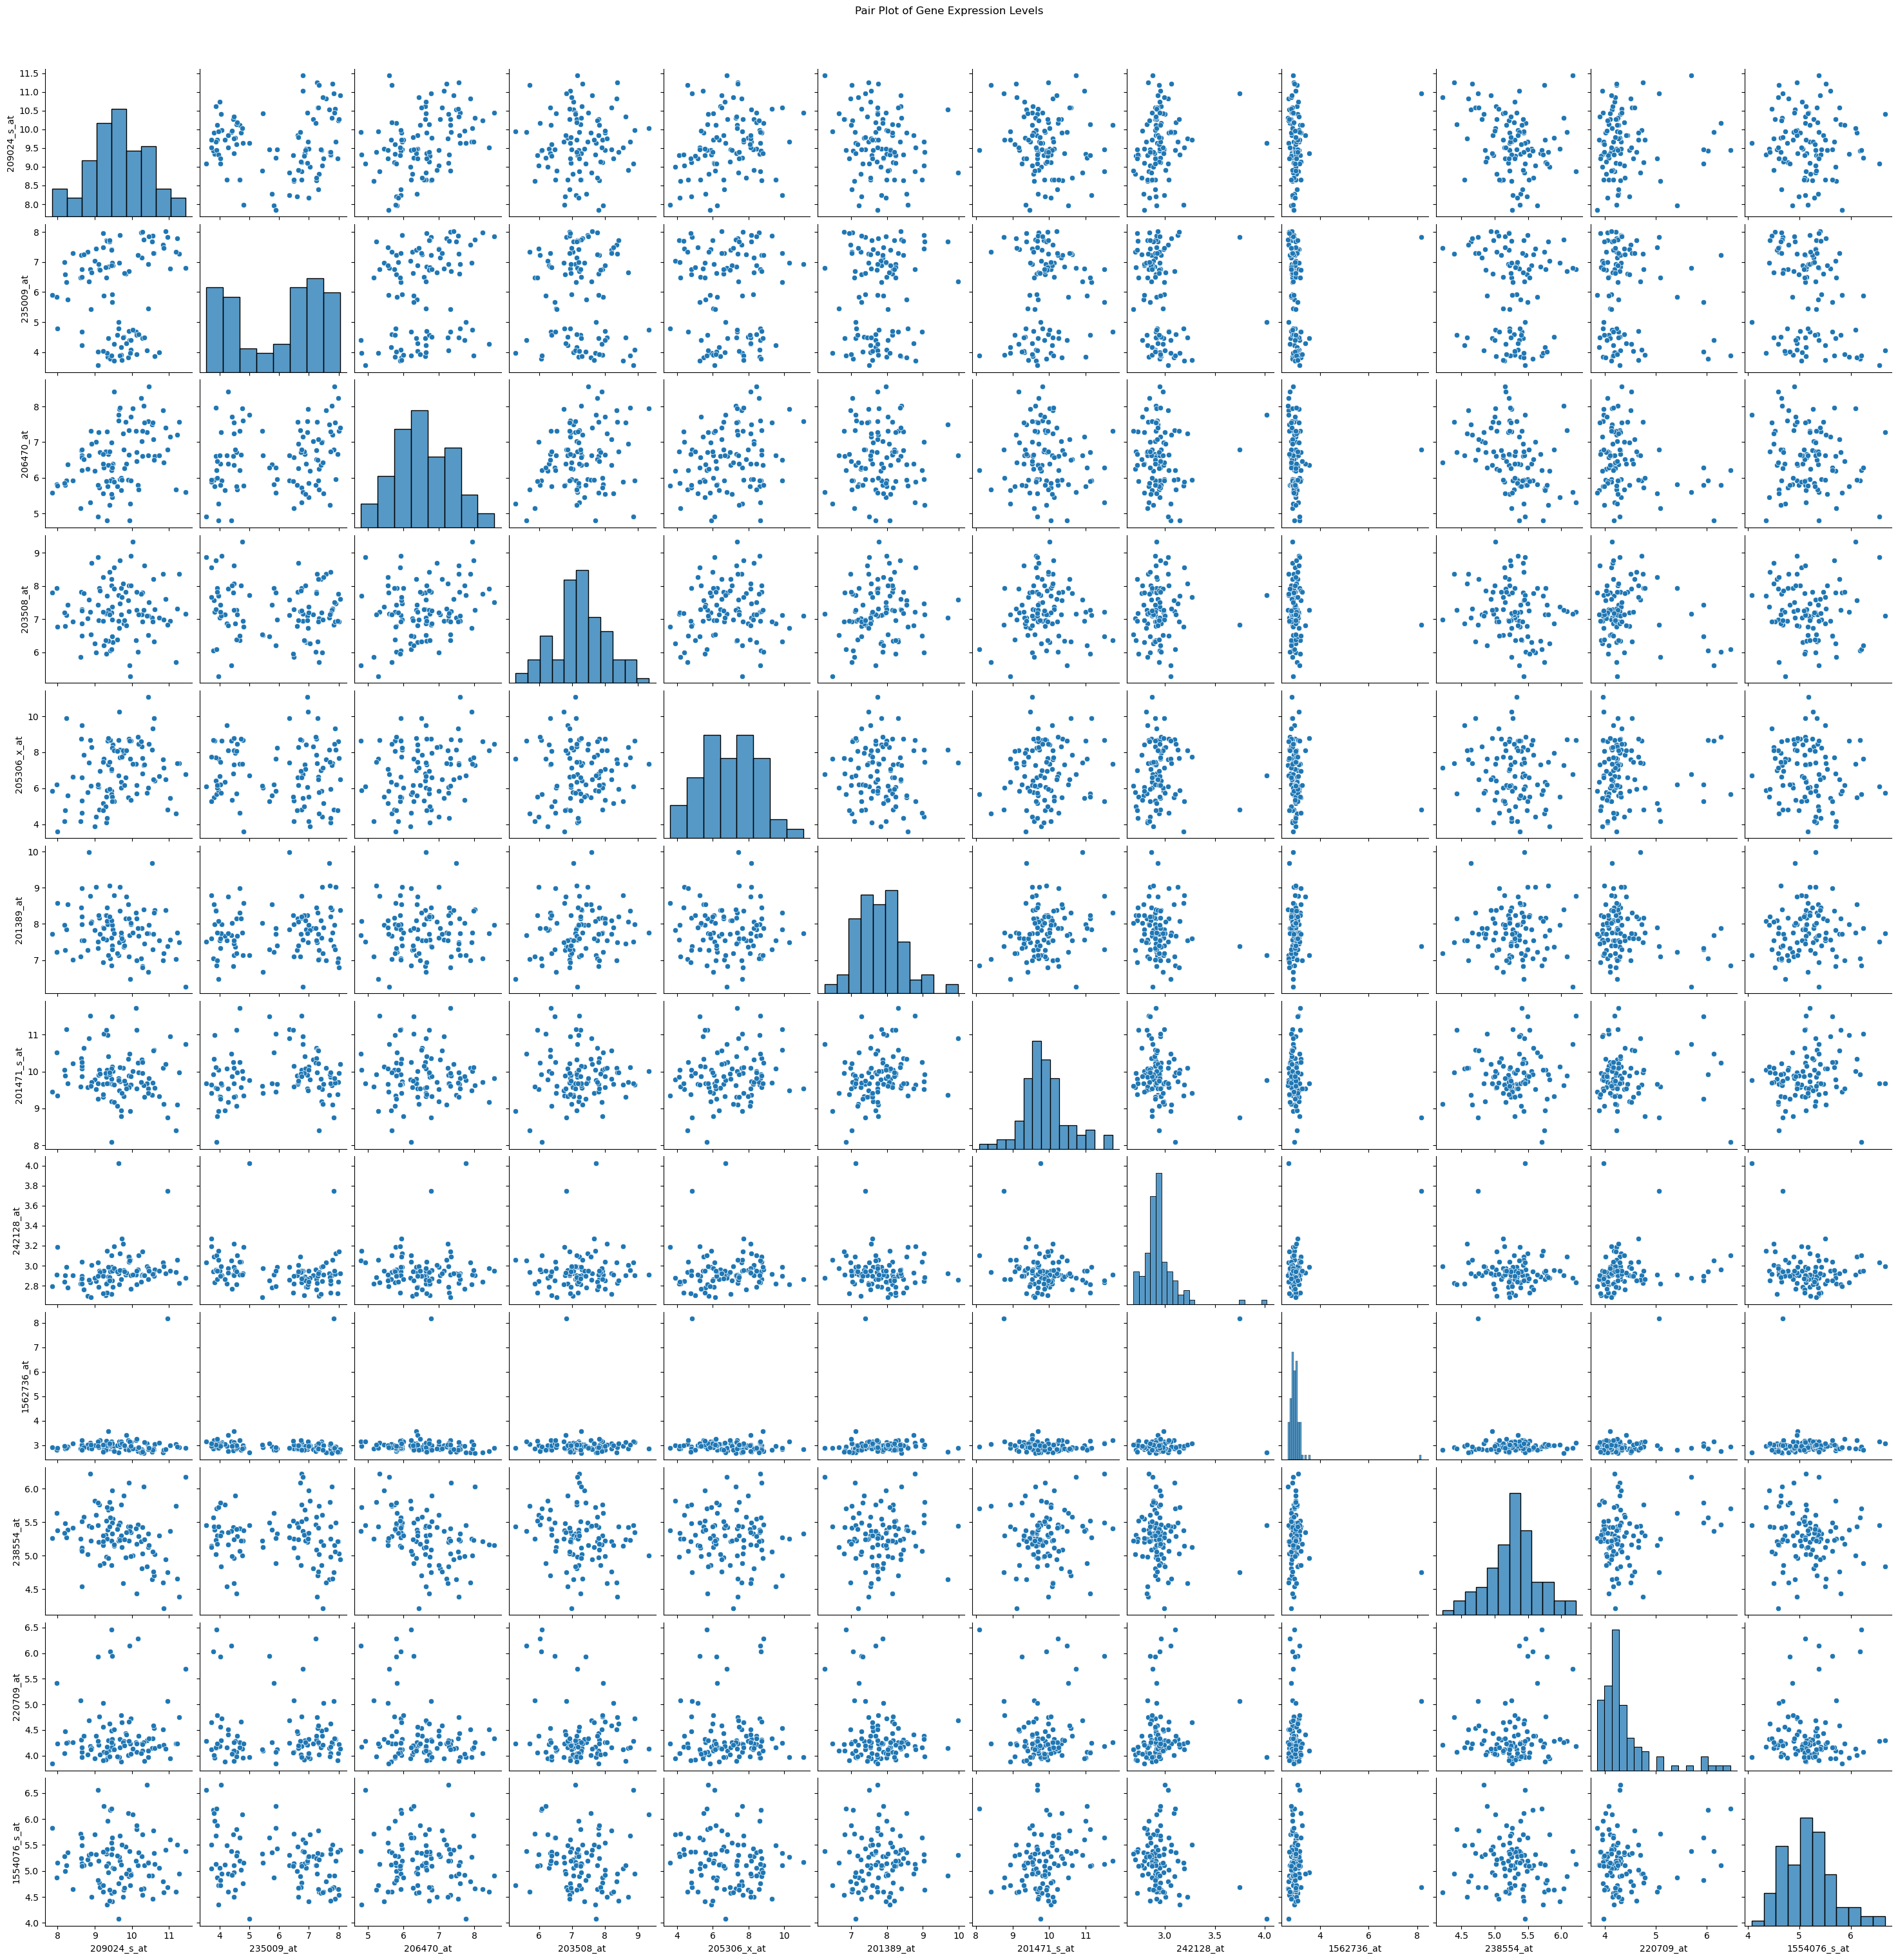

In [162]:
selected_genes_for_pairplot = gene_names[:12]

# Create a pairplot
sns.pairplot(train_data[selected_genes_for_pairplot])
plt.suptitle('Pair Plot of Gene Expression Levels', y=1.02)
plt.show()

***Observations and Analysis:***

- The presence of clusters indicate groups of samples with similar expression profiles.

### Violin Plot

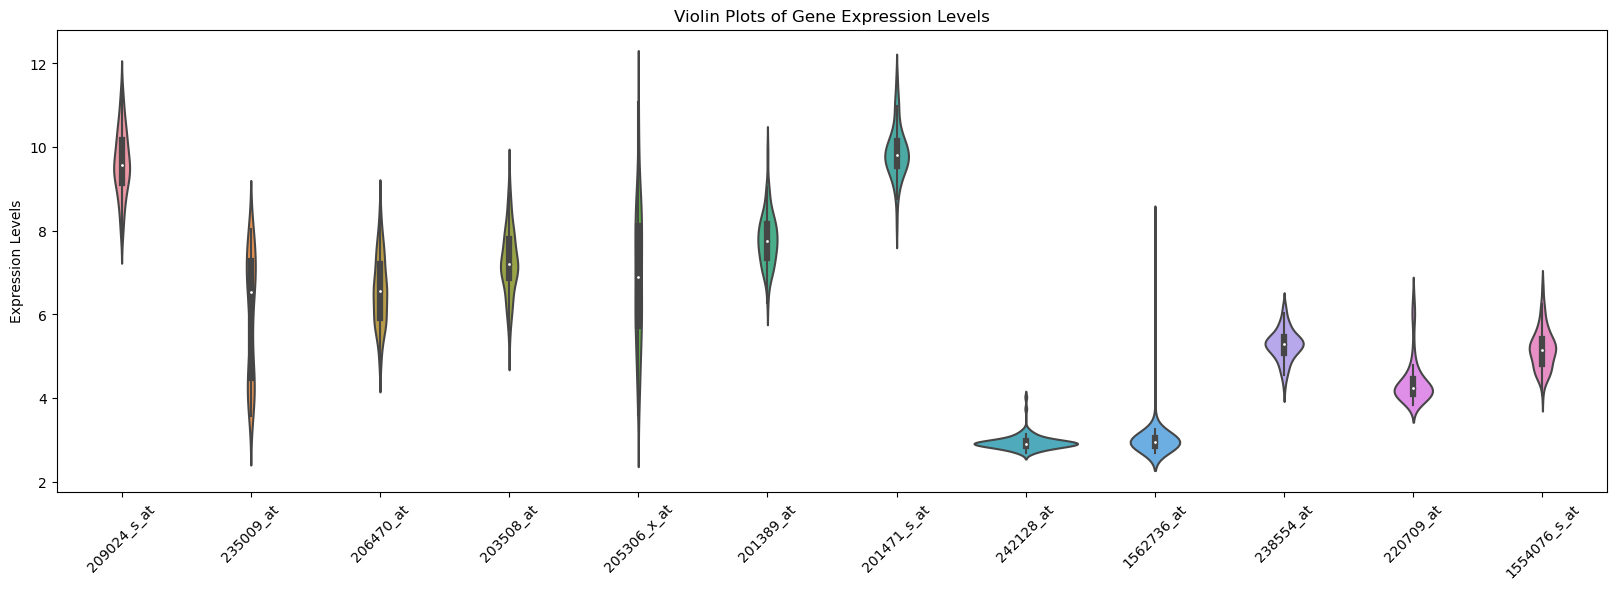

In [163]:
selected_genes_for_violinplot = gene_names[:12]

# Create violin plots
plt.figure(figsize=(20, 6))
sns.violinplot(data=train_data[selected_genes_for_violinplot])
plt.title('Violin Plots of Gene Expression Levels')
plt.ylabel('Expression Levels')
plt.xticks(rotation=45)  # Rotate the x labels to fit them better
plt.show()


***Observations and Analysis:***

- Varied densities can indicate that some genes have more variable expression levels than others.

- This may have biological implications, such as stability of gene expression across different conditions or cancer types.

# Preparing for models

### Picking out random genes

To assess the accuracy of the genes that we picked using PCA, we randomly selected equal number of genes.

In [164]:
gene_names = features.columns

# Set the seed for reproducibility
np.random.seed(3)

random_genes = np.random.choice(gene_names, 12, replace=False)

# Print the selected random genes
print(random_genes)

['207535_s_at' '213652_at' '237827_at' '204063_s_at' '1554299_at'
 '206821_x_at' '201689_s_at' '1569300_at' '240547_at' '230821_at'
 '243438_at' '220787_at']


These are the 12 random genes that we will use with our models.

## Preparing our data for our models

In [165]:
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Extract features and target from train_data and test_data
features_train = train_data.drop(['type', 'samples'], axis=1)  # Adjust if other columns should be dropped
features_test = test_data.drop(['type', 'samples'], axis=1)

target_train = train_data['type']
target_test = test_data['type']

# Binarize the target for One vs All approach if it's multi-class
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(target_train)  # Encode target labels with value between 0 and n_classes-1.
y_test = label_encoder.transform(target_test)  # Use the same encoder to ensure consistency

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Prepare features and labels
features_train = train_data.drop(['type', 'samples'], axis=1)
features_test = test_data.drop(['type', 'samples'], axis=1)
target_train = train_data['type']
target_test = test_data['type']

# Encoding target labels with LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(target_train)
y_test = label_encoder.transform(target_test)

# Binarize the labels for ROC curve plotting (if needed)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

### Defining functions for our model analysis

In [167]:
# ROC plot function

def plot_roc_curve_multiclass(y_test, y_scores_pca, y_scores_random, title_pca, title_random):
    n_classes = y_test.shape[1]
    
    # Create a subplot of 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    for i in range(n_classes):
        # For PCA-selected genes
        fpr, tpr, _ = roc_curve(y_test[:, i], y_scores_pca[:, i])
        roc_auc = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

        # For randomly-selected genes
        fpr, tpr, _ = roc_curve(y_test[:, i], y_scores_random[:, i])
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    for ax, title in zip(axes, [title_pca, title_random]):
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curves - {title}')
        ax.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

# Number of classes
n_classes = len(np.unique(y_train))

# Confusion Matrix Plot function
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_true, y_pred1, y_pred2, title1, title2):
    # Compute confusion matrices
    cm1 = confusion_matrix(y_true, y_pred1)
    cm2 = confusion_matrix(y_true, y_pred2)
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot first confusion matrix
    sns.heatmap(cm1, annot=True, fmt="d", cmap='Blues', xticklabels=True, yticklabels=True, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {title1}')
    axes[0].set_ylabel('True label')
    axes[0].set_xlabel('Predicted label')
    
    # Plot second confusion matrix
    sns.heatmap(cm2, annot=True, fmt="d", cmap='Blues', xticklabels=True, yticklabels=True, ax=axes[1])
    axes[1].set_title(f'Confusion Matrix - {title2}')
    axes[1].set_ylabel('True label')
    axes[1].set_xlabel('Predicted label')
    
    plt.tight_layout()
    plt.show()
    
    return cm1, cm2

# Evaluation metrics function
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Model Analysis

## Model 1: K-Nearest-Neighbours Classification Model (KNN)

### KNN: Applying the classification model

In [168]:
# Setup KNN Classifier
knn_ovr_classifier = OneVsRestClassifier(KNeighborsClassifier())

# Extracting indices for PCA and random features from 'gene_df' DataFrame
genes_pca_indices = [features_train.columns.get_loc(gene) for gene in gene_df['query'].values if gene in features_train.columns]
random_genes_indices = [features_train.columns.get_loc(gene) for gene in random_genes if gene in features_train.columns]

# Train and predict with KNN using PCA-selected genes
knn_ovr_classifier.fit(X_train_scaled[:, genes_pca_indices], y_train)
probs_pca_knn = knn_ovr_classifier.predict_proba(X_test_scaled[:, genes_pca_indices])
y_pred_pca_knn = knn_ovr_classifier.predict(X_test_scaled[:, genes_pca_indices])

# Train and predict with KNN using randomly selected genes
knn_ovr_classifier.fit(X_train_scaled[:, random_genes_indices], y_train)
probs_random_knn = knn_ovr_classifier.predict_proba(X_test_scaled[:, random_genes_indices])
y_pred_random_knn = knn_ovr_classifier.predict(X_test_scaled[:, random_genes_indices])

### KNN: Plotting ROC curves

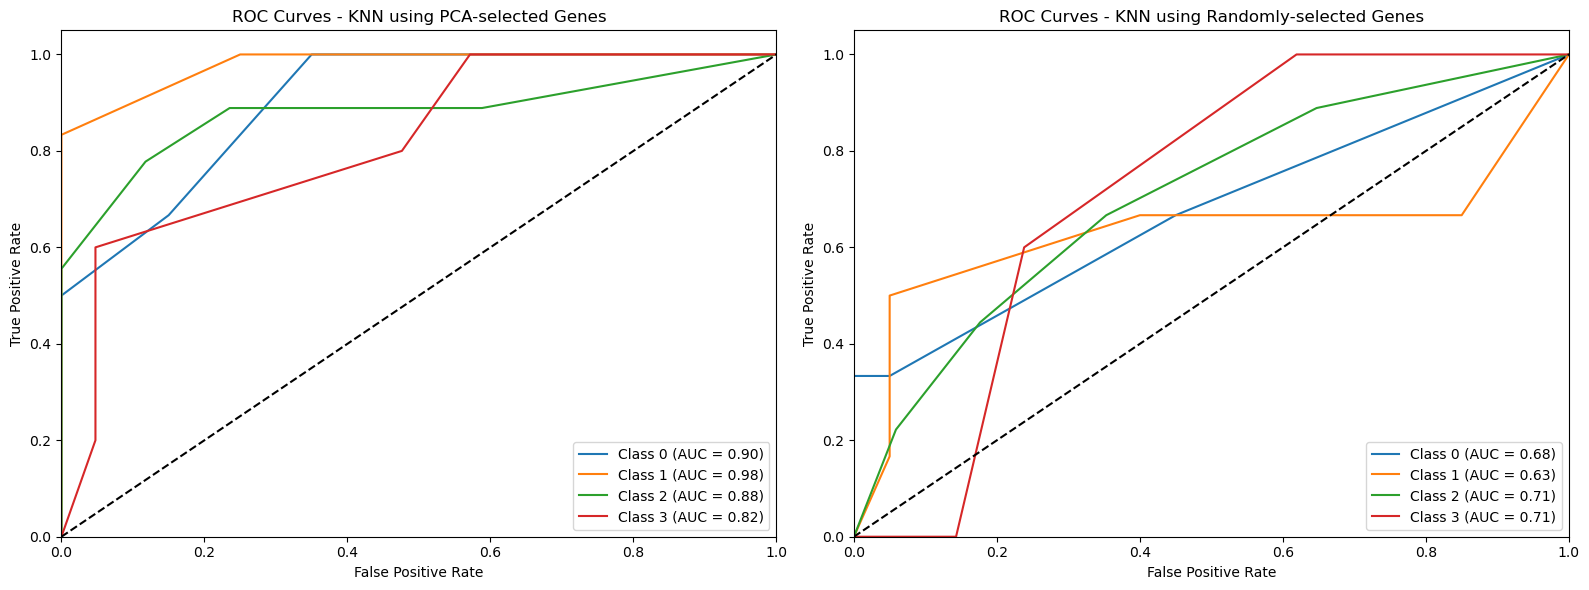

In [169]:
# Plot ROC Curves for PCA-selected genes and randomly-selected genes side by side
plot_roc_curve_multiclass(y_test_bin, probs_pca_knn, probs_random_knn, 
                          'KNN using PCA-selected Genes', 'KNN using Randomly-selected Genes')

### KNN: Plotting Confusion Matrix and finding the accuracy of model

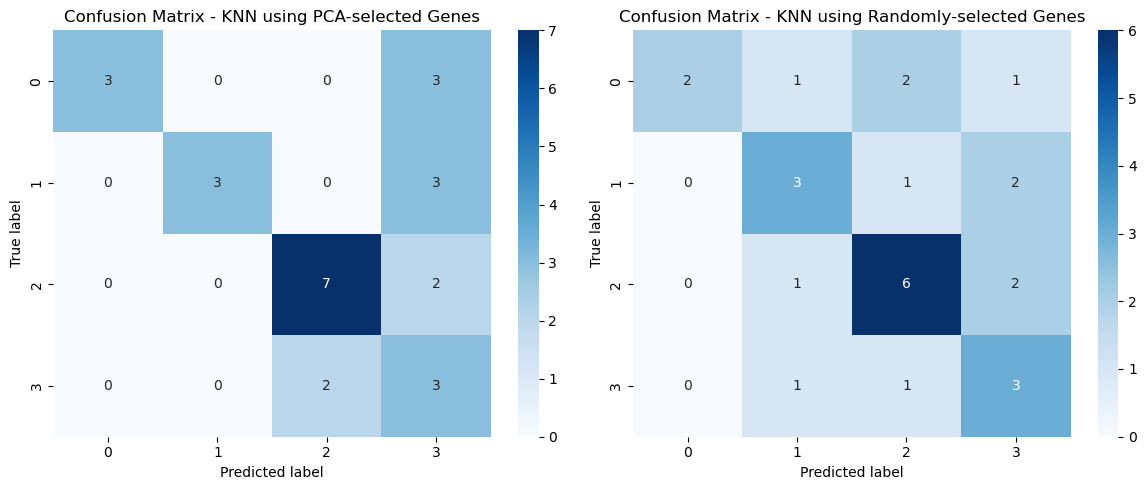

Accuracy for KNN using PCA-selected genes: 61.54%
Accuracy for KNN using randomly-selected genes: 53.85%


In [170]:
# Plotting Confusion Matrices for KNN with PCA-selected and randomly selected genes
cm_pca_knn, cm_random_knn = plot_confusion_matrices(y_test, y_pred_pca_knn, y_pred_random_knn, 
                                                    'KNN using PCA-selected Genes', 'KNN using Randomly-selected Genes')

# Calculate accuracy for PCA-selected and randomly-selected genes with KNN
accuracy_pca_knn = np.trace(cm_pca_knn) / np.sum(cm_pca_knn)
accuracy_random_knn = np.trace(cm_random_knn) / np.sum(cm_random_knn)

print(f"Accuracy for KNN using PCA-selected genes: {accuracy_pca_knn:.2%}")
print(f"Accuracy for KNN using randomly-selected genes: {accuracy_random_knn:.2%}")

In [171]:
# Calculate metrics
accuracy_pca_knn, precision_pca_knn, recall_pca_knn, f1_pca_knn = calculate_metrics(y_test, y_pred_pca_knn)
accuracy_random_knn, precision_random_knn, recall_random_knn, f1_random_knn = calculate_metrics(y_test, y_pred_random_knn)

# Print metrics for PCA-selected genes
print("Goodness of Fit of KNN Model (PCA) - Test Dataset:")
print(f"- Accuracy: {accuracy_pca_knn:.2}")
print(f"- Precision: {precision_pca_knn:.2f}")
print(f"- Recall: {recall_pca_knn:.2f}")
print(f"- F1 Score: {f1_pca_knn:.2f}\n")

# Print metrics for random-selected genes
print("Goodness of Fit of KNN Model (Random) - Test Dataset:")
print(f"- Accuracy: {accuracy_random_knn:.2}")
print(f"- Precision: {precision_random_knn:.2f}")
print(f"- Recall: {recall_random_knn:.2f}")
print(f"- F1 Score: {f1_random_knn:.2f}")

Goodness of Fit of KNN Model (PCA) - Test Dataset:
- Accuracy: 0.62
- Precision: 0.76
- Recall: 0.59
- F1 Score: 0.62

Goodness of Fit of KNN Model (Random) - Test Dataset:
- Accuracy: 0.54
- Precision: 0.62
- Recall: 0.53
- F1 Score: 0.52


### Observations and Analysis from KNN Classifier Model

Based on the evaluation metrics provided for the KNN model utilizing PCA-selected versus randomly selected genes, it appears that the PCA-selected genes yield slightly better accuracy, precision, recall, and F1 scores.

#### Accuracy
Specifically, the accuracy of the PCA-selected genes model performs marginally better at 0.62, than randomly selected genes model's accuracy of 0.54, indicating the PCA method provides slight improvement in selecting features that contribute to a more reliable predictive model for this dataset.

#### Precision
The precision of 0.76 for the PCA-selected model suggests that, among the positive identifications, a higher proportion was actually correct when compared to the precision of 0.62 for the random model.

#### Recall
The recall rate for both models is relatively close — 0.59 for PCA and 0.53 for random — indicating that the number of actual positives correctly identified by the model is not dramatically different between the two methods.

#### F1 Score
The F1 score, which balances precision and recall, stands at 0.62 for the PCA model and 0.52 for the random model. This metric further confirms that the PCA model is slightly more robust, though the performance is not exceptionally high for either.

#### Conclusion
These results suggest that while the PCA method does offer some advantages over random selection in this instance, the overall performance of the KNN model is moderate at best. This may indicate the need for alternative modeling techniques or feature selection methods to better capture the complexity of the underlying data structure and improve the model's predictive power. It's also possible that the KNN model is not the most appropriate choice for this particular dataset and problem, and exploring other models might yield more favorable results, which we will be following up with the Random Forest and SVM Classifier Models.

# Model 2: Random Forest (RF) Classification Model

### Random Forest: Applying the classification model

In [172]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Encoding target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(target_train)
y_test = label_encoder.transform(target_test)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

# Initialize Random Forest classifier within OneVsRestClassifier for multiclass ROC curve plotting
rf_classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=0))

# Train and predict using PCA-selected genes
rf_classifier.fit(X_train_scaled[:, genes_pca_indices], y_train)
probs_pca_rf = rf_classifier.predict_proba(X_test_scaled[:, genes_pca_indices])

# Train and predict using randomly selected genes
rf_classifier.fit(X_train_scaled[:, random_genes_indices], y_train)
probs_random_rf = rf_classifier.predict_proba(X_test_scaled[:, random_genes_indices])

# Encode the test labels into binary format for ROC plotting
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

### Random Forest: Plotting ROC curves

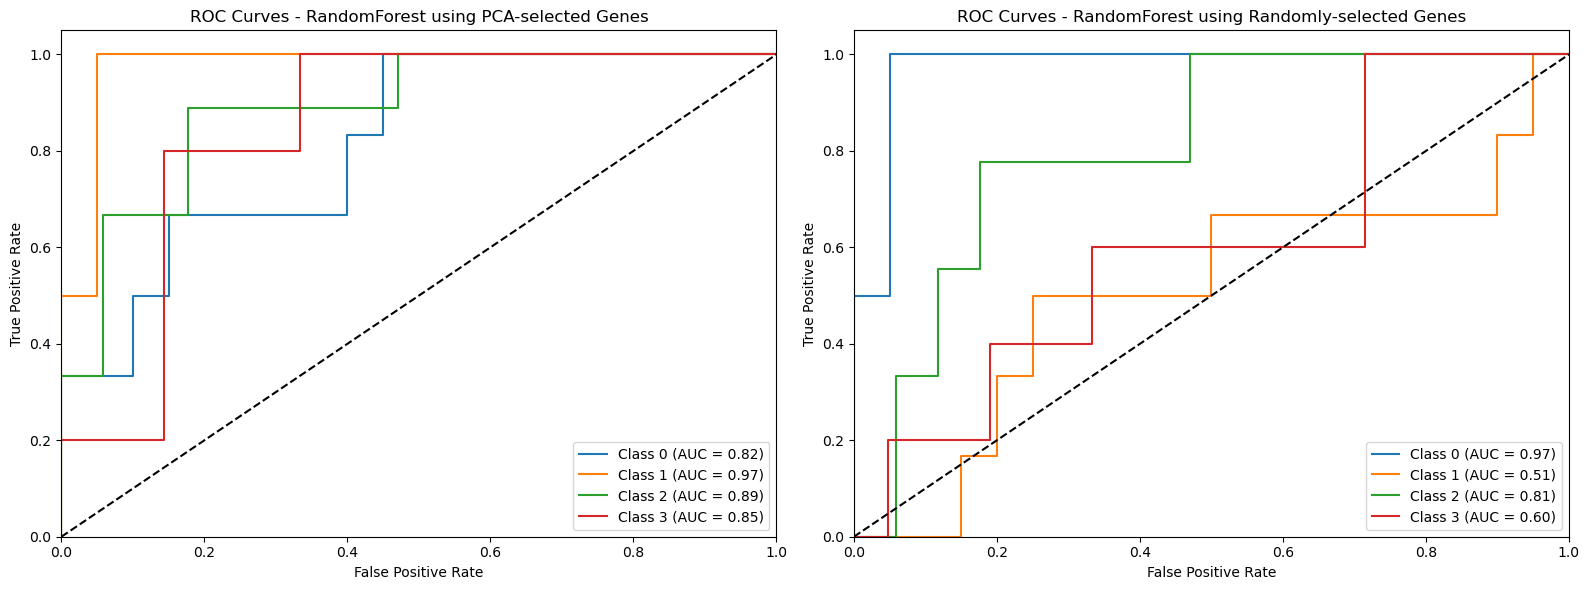

In [173]:
plot_roc_curve_multiclass(y_test_bin, probs_pca_rf, probs_random_rf, 
                          'RandomForest using PCA-selected Genes', 'RandomForest using Randomly-selected Genes')

### Random Forest: Plotting Confusion Matrix and finding the accuracy of model

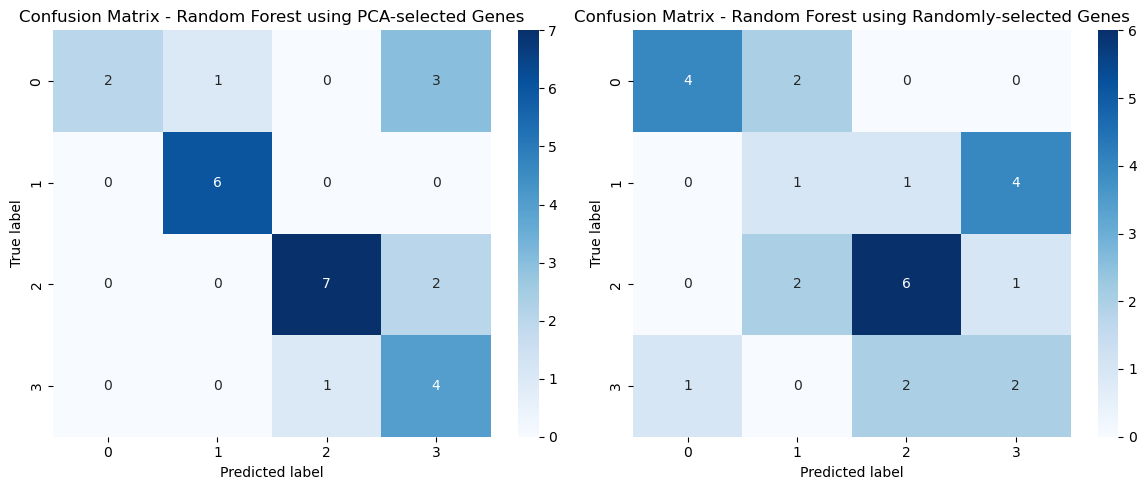

Accuracy for Random Forest using PCA-selected genes: 73.08%
Accuracy for Random Forest using randomly-selected genes: 50.00%


In [174]:
# Assuming that y_test_labels is defined and y_pred_pca_rf, y_pred_random_rf are obtained from your Random Forest model
# Convert predicted probabilities to class predictions for Random Forest
y_pred_pca_rf = np.argmax(probs_pca_rf, axis=1)
y_pred_random_rf = np.argmax(probs_random_rf, axis=1)

# Plotting Confusion Matrices for Random Forest with PCA-selected and randomly selected genes
cm_pca_rf, cm_random_rf = plot_confusion_matrices(y_test, y_pred_pca_rf, y_pred_random_rf, 
                                                  'Random Forest using PCA-selected Genes', 'Random Forest using Randomly-selected Genes')

# Calculate accuracy for PCA-selected and randomly-selected genes with Random Forest
accuracy_pca_rf = np.trace(cm_pca_rf) / np.sum(cm_pca_rf)
accuracy_random_rf = np.trace(cm_random_rf) / np.sum(cm_random_rf)

print(f"Accuracy for Random Forest using PCA-selected genes: {accuracy_pca_rf:.2%}")
print(f"Accuracy for Random Forest using randomly-selected genes: {accuracy_random_rf:.2%}")

### Random Forest: Evaluation Metrics for Model

In [175]:
# Calculate metrics
accuracy_pca_rf, precision_pca_rf, recall_pca_rf, f1_pca_rf = calculate_metrics(y_test, y_pred_pca_rf)
accuracy_random_rf, precision_random_rf, recall_random_rf, f1_random_rf = calculate_metrics(y_test, y_pred_random_rf)

# Print metrics for PCA-selected genes
print("Goodness of Fit of RF Model (PCA) - Test Dataset:")
print(f"- Accuracy: {accuracy_pca_rf:.2f}")
print(f"- Precision: {precision_pca_rf:.2f}")
print(f"- Recall: {recall_pca_rf:.2f}")
print(f"- F1 Score: {f1_pca_rf:.2f}\n")

# Print metrics for randomly-selected genes
print("Goodness of Fit of RF Model (Random) - Test Dataset:")
print(f"- Accuracy: {accuracy_random_rf:.2f}")
print(f"- Precision: {precision_random_rf:.2f}")
print(f"- Recall: {recall_random_rf:.2f}")
print(f"- F1 Score: {f1_random_rf:.2f}")

Goodness of Fit of RF Model (PCA) - Test Dataset:
- Accuracy: 0.73
- Precision: 0.79
- Recall: 0.73
- F1 Score: 0.70

Goodness of Fit of RF Model (Random) - Test Dataset:
- Accuracy: 0.50
- Precision: 0.49
- Recall: 0.47
- F1 Score: 0.48


### Observations and Analysis from RF Classifier Model

Based on the evaluation metrics provided for the RF model utilizing PCA-selected versus randomly selected genes, the RF classifier's performance with PCA-selected genes overshadows its counterpart that utilizes randomly selected genes.

#### Accuracy
Notably, the accuracy escalates from 0.50 to 0.73 when comparing the random selection to the PCA method. This substantial improvement indicates a more discerning feature selection process afforded by PCA, enabling the model to more accurately capture the essence of the data.

#### Precision
The model's precision follows suit, with a notable increase from 0.49 to 0.79. This leap signifies that the PCA-selected model has a higher likelihood of classifying true positives correctly, suggesting that the features it relies upon are more relevant to the predictive task at hand

#### Recall
The model’s recall increases from 0.47 to 0.73 when leveraging PCA-selected genes, indicating that it has become more adept at capturing the majority of actual positives within the dataset.

#### F1 Score
Finally, the F1 Score, which harmonizes precision and recall, witnesses a rise from 0.48 to 0.70, underscoring that the balance between the model’s precision and its ability to detect positives is significantly enhanced by PCA.

#### Conclusion
The performance lift observed with PCA-selected genes across all metrics underscores the method’s efficacy in selecting informative features that enable the Random Forest model to perform with greater predictive power. Despite the improvements, the results also prompt an evaluation of model complexity and feature interplay, suggesting that further tuning and possibly the inclusion of additional, contextually relevant features could refine the model's predictions.

# Model 3: Support Vector Machine (SVM) Classifier 

### Support Vector Machine (SVM): Applying the classification model

In [176]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encoding target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(target_train)
y_test = label_encoder.transform(target_test)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

# Setup SVM Classifier
svm_classifier = SVC(probability=True, random_state=0)

# Train SVM using PCA-selected genes
svm_classifier.fit(X_train_scaled[:, genes_pca_indices], y_train)
probs_pca_svm = svm_classifier.predict_proba(X_test_scaled[:, genes_pca_indices])

# Convert probabilities to predictions
y_pred_pca_svm = np.argmax(probs_pca_svm, axis=1)

# Train SVM using randomly selected genes
svm_classifier.fit(X_train_scaled[:, random_genes_indices], y_train)
probs_random_svm = svm_classifier.predict_proba(X_test_scaled[:, random_genes_indices])

# Convert probabilities to predictions
y_pred_random_svm = np.argmax(probs_random_svm, axis=1)

### Support Vector Machine: Plotting ROC curves

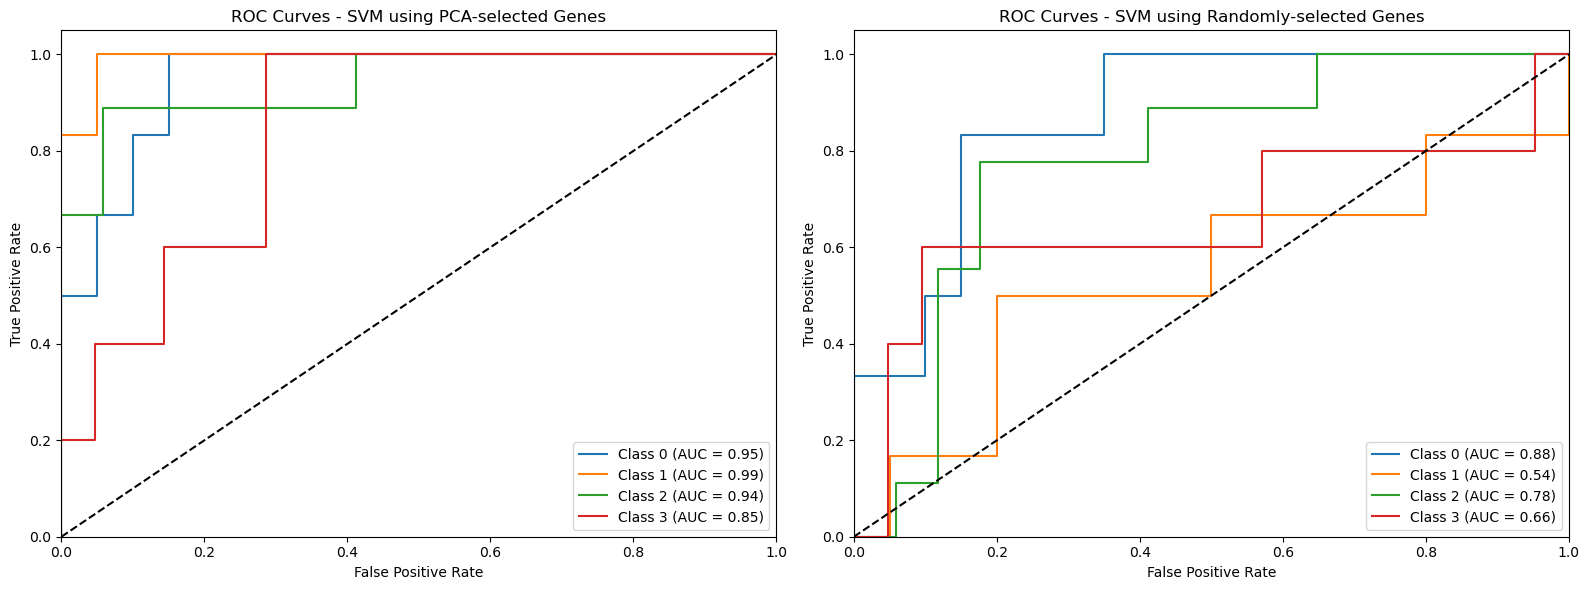

In [177]:
plot_roc_curve_multiclass(y_test_bin, probs_pca_svm, probs_random_svm, 
                          'SVM using PCA-selected Genes', 'SVM using Randomly-selected Genes')

### Support Vector Machine: Plotting Confusion Matrix and finding the accuracy of model

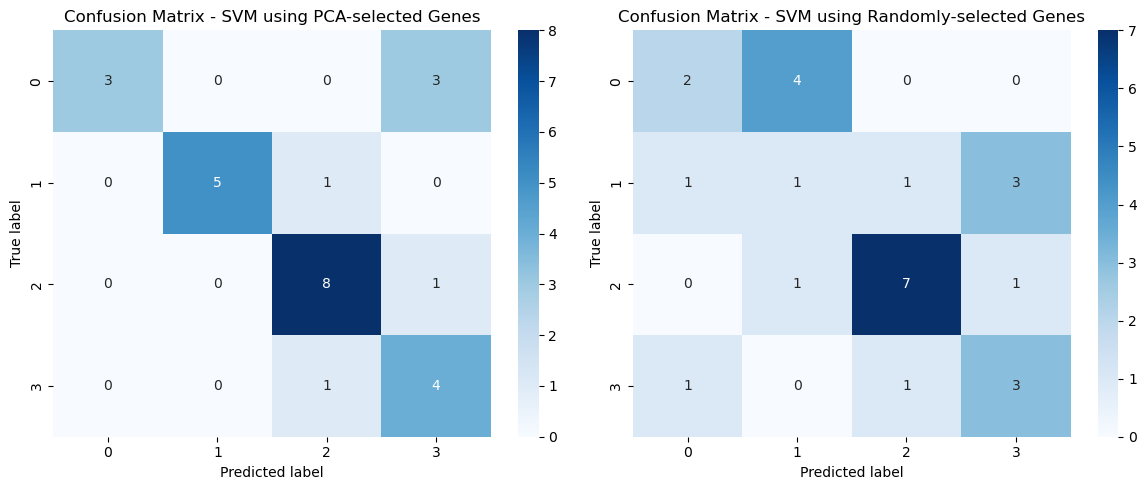

Accuracy for SVM using PCA-selected genes: 76.92%
Accuracy for SVM using randomly-selected genes: 50.00%


In [178]:
# Convert predicted probabilities to class predictions for SVM
y_pred_pca_svm = np.argmax(probs_pca_svm, axis=1)
y_pred_random_svm = np.argmax(probs_random_svm, axis=1)

# Plotting Confusion Matrices for SVM with PCA-selected and randomly selected genes
cm_pca_svm, cm_random_svm = plot_confusion_matrices(y_test, y_pred_pca_svm, y_pred_random_svm, 
                                                    'SVM using PCA-selected Genes', 'SVM using Randomly-selected Genes')

# Calculate accuracy for PCA-selected and randomly-selected genes with SVM
accuracy_pca_svm = np.trace(cm_pca_svm) / np.sum(cm_pca_svm)
accuracy_random_svm = np.trace(cm_random_svm) / np.sum(cm_random_svm)

print(f"Accuracy for SVM using PCA-selected genes: {accuracy_pca_svm:.2%}")
print(f"Accuracy for SVM using randomly-selected genes: {accuracy_random_svm:.2%}")

### Support Vector Machine: Evaluation Metrics for Model

In [179]:
# Calculate metrics
accuracy_pca_svm, precision_pca_svm, recall_pca_svm, f1_pca_svm = calculate_metrics(y_test, y_pred_pca_svm)
accuracy_random_svm, precision_random_svm, recall_random_svm, f1_random_svm = calculate_metrics(y_test, y_pred_random_svm)

# Print metrics for PCA-selected genes
print("Goodness of Fit of SVM Model (PCA) - Test Dataset:")
print(f"- Accuracy: {accuracy_pca_svm:.2f}")
print(f"- Precision: {precision_pca_svm:.2f}")
print(f"- Recall: {precision_pca_svm:.2f}")
print(f"- F1 Score: {f1_pca_svm:.2f}\n")

# Print metrics for randomly-selected genes
print("Goodness of Fit of SVM Model (Random) - Test Dataset:")
print(f"- Accuracy: {accuracy_random_svm:.2f}")
print(f"- Precision: {precision_random_svm:.2f}")
print(f"- Recall: {recall_random_svm:.2f}")
print(f"- F1 Score: {f1_random_svm:.2f}")


Goodness of Fit of SVM Model (PCA) - Test Dataset:
- Accuracy: 0.77
- Precision: 0.82
- Recall: 0.82
- F1 Score: 0.76

Goodness of Fit of SVM Model (Random) - Test Dataset:
- Accuracy: 0.50
- Precision: 0.47
- Recall: 0.47
- F1 Score: 0.46


### Observations and Analysis from SVM Classifier Model

Based on the evaluation metrics provided for the SVM model utilizing PCA-selected versus randomly selected genes, the SVM model echoes a similar narrative to that of the RF mode.

#### Accuracy
The accuracy for the PCA-selected genes outstrips the random selection, registering at 0.77 compared to 0.50. This contrast marks the PCA approach's ability to distill the data into a more potent subset of variables for model training.

#### Precision
Precision sees a rise from 0.47 to 0.82, illustrating the PCA-selected gene model's proficiency in correctly identifying true positives against false positives—a testament to the robustness of the feature selection.

#### Recall
Recall for the PCA method measures at 0.82, a significant ascent from the 0.47 achieved with random selection, indicating the model’s increased capacity to retrieve a larger fraction of relevant instances.

#### F1 Score
The F1 Score for PCA-selection stands at a solid 0.76, distancing itself from the 0.46 score of the random model, reinforcing the model’s balanced strength in precision and recall.

#### Conclusion
The SVM model capitalizes on the refined feature set provided by PCA, as evidenced by the uniformly elevated performance metrics. The analysis suggests that the SVM model, powered by PCA-selected features, is not only more accurate but also more reliable in its predictions than when it relies on a random selection of features. Further explorations could delve into hyperparameter optimization and cross-validation to bolster the model’s robustness and ensure its stability across various data subsets.

# Model Evaluation

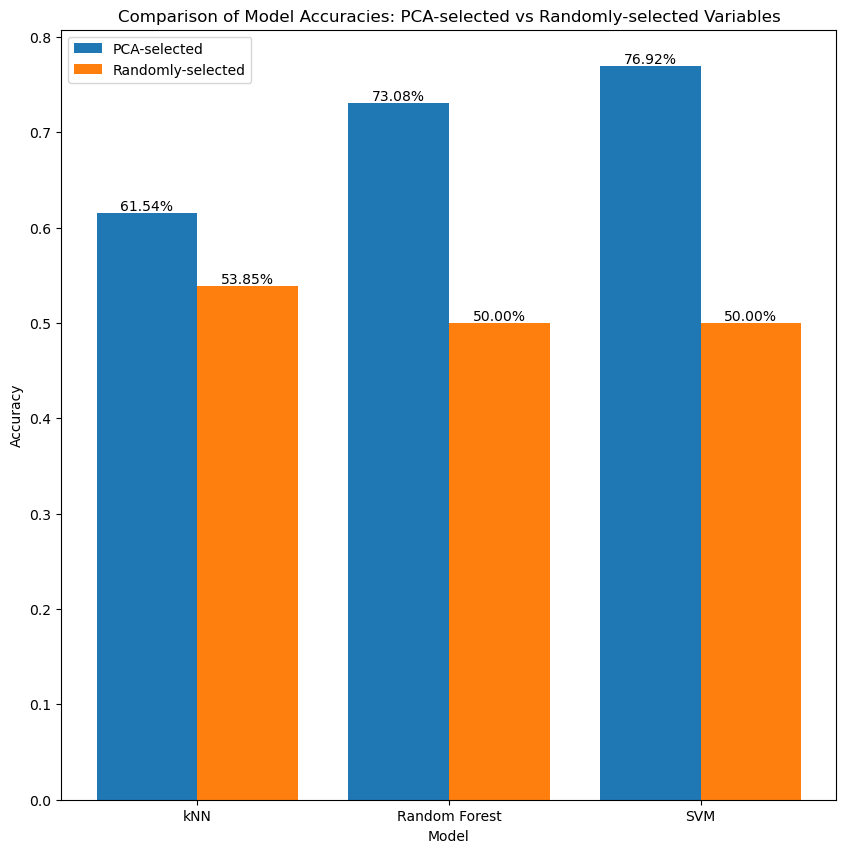

In [180]:
# Names of the models
models = ['kNN', 'Random Forest', 'SVM']

# Accuracy values
accuracies_pca = [accuracy_pca_knn, accuracy_pca_rf, accuracy_pca_svm]
accuracies_random = [accuracy_random_knn, accuracy_random_rf, accuracy_random_svm]

# X positions of bars
x = range(len(models))

# Plotting the bar chart
plt.figure(figsize=(10, 10))

# Create bars for PCA-selected genes
pca_bars = plt.bar(x, accuracies_pca, width=0.4, label='PCA-selected', align='center')

# Create bars for randomly-selected genes with some offset
offset = 0.4
random_bars = plt.bar([p + offset for p in x], accuracies_random, width=0.4, label='Randomly-selected', align='center')

# Function to add data labels on top of each bar
def add_data_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.2%}", va='bottom', ha='center')

# Call the function to add labels to the bars
add_data_labels(pca_bars)
add_data_labels(random_bars)

# Adding names to the x-axis
plt.xticks([p + offset / 2 for p in x], models)

# Adding axes labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies: PCA-selected vs Randomly-selected Variables')

plt.legend()
plt.show()